<a href="https://colab.research.google.com/github/TejasSawant21/python-project/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files

# Upload and load the dataset
uploaded = files.upload()
file_path = list(uploaded.keys())[0]  # Get the uploaded file name
books = pd.read_csv(file_path)

# Display basic info
print("Dataset Overview:")
print(books.info())

# Data Cleaning
books['price'] = pd.to_numeric(books['price'], errors='coerce')  # Convert price to numeric
books['pages'] = pd.to_numeric(books['pages'], errors='coerce')  # Convert pages to numeric
books['publishDate'] = pd.to_datetime(books['publishDate'], errors='coerce')  # Convert publishDate
books['rating'] = books['rating'].fillna(books['rating'].mean())  # Fill missing ratings
books['numRatings'] = books['numRatings'].fillna(0)  # Fill missing ratings count

# Drop irrelevant columns
books_cleaned = books.drop(columns=['isbn', 'coverImg', 'edition', 'bbeScore', 'bbeVotes', 'characters'])

Saving books_1.Best_Books_Ever.csv to books_1.Best_Books_Ever (1).csv
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15 

<ipython-input-8-3ac842dcb502>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  books['publishDate'] = pd.to_datetime(books['publishDate'], errors='coerce')  # Convert publishDate


<ipython-input-10-77ae6b0c2556>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_rated, x='rating', y='title', palette='viridis')


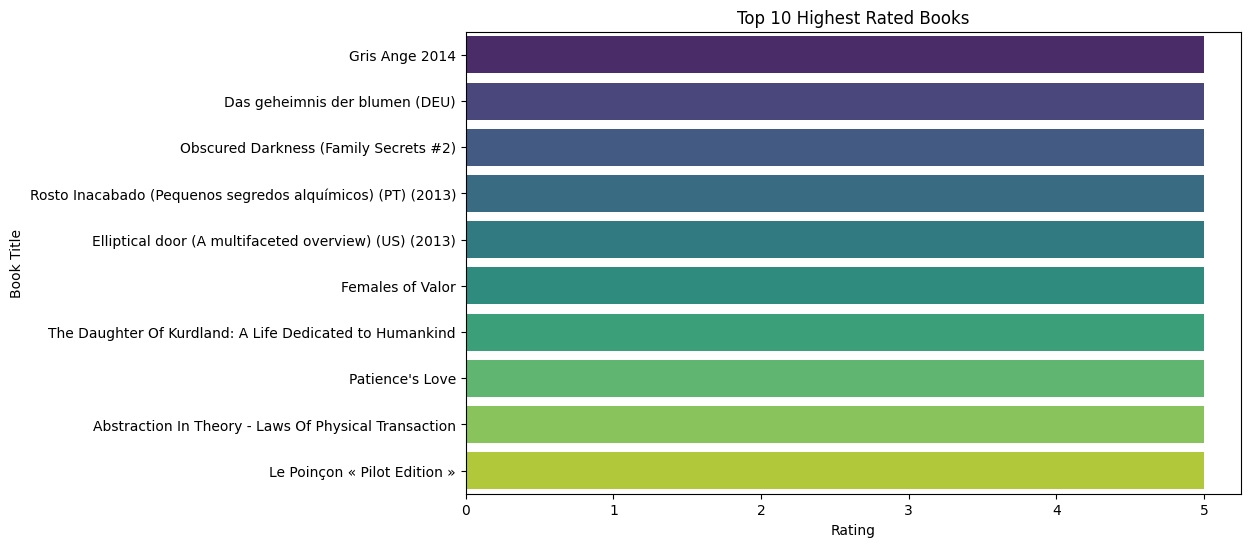

In [10]:
# top-rated books
plt.figure(figsize=(10, 6))
sns.barplot(data=highest_rated, x='rating', y='title', palette='viridis')
plt.title('Top 10 Highest Rated Books')
plt.xlabel('Rating')
plt.ylabel('Book Title')
plt.show()

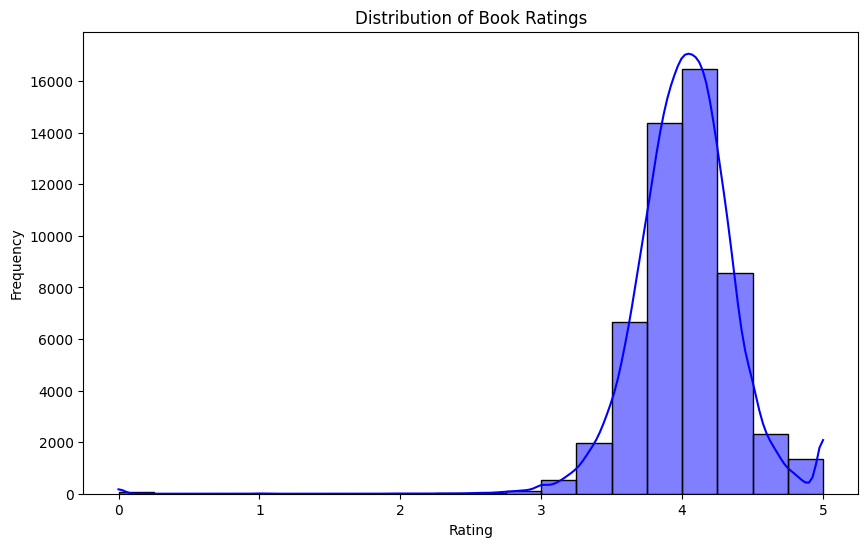

In [12]:
#  Distribution of book ratings
plt.figure(figsize=(10, 6))
sns.histplot(books_cleaned['rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


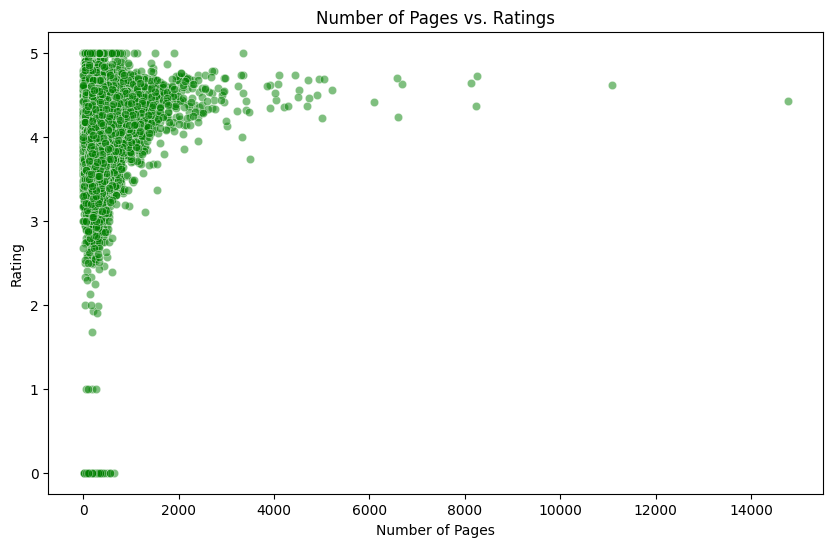

In [13]:
# Correlation between number of pages and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=books_cleaned, x='pages', y='rating', alpha=0.5, color='green')
plt.title('Number of Pages vs. Ratings')
plt.xlabel('Number of Pages')
plt.ylabel('Rating')
plt.show()

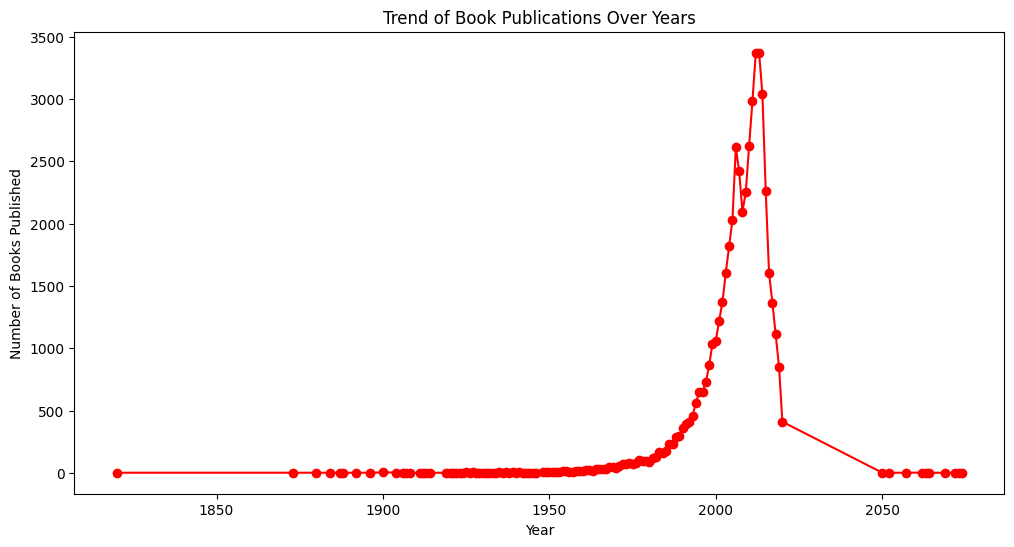

In [15]:
#  Trend of book publication over years
books_cleaned['year'] = books_cleaned['publishDate'].dt.year
publish_trend = books_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
publish_trend.plot(kind='line', marker='o', color='red')
plt.title('Trend of Book Publications Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.show()


Top 10 Languages with Highest Average Ratings:
language
French, Middle (ca.1400-1600)            5.000000
Maltese                                  5.000000
Iranian (Other)                          5.000000
Norwegian Nynorsk; Nynorsk, Norwegian    5.000000
Ukrainian                                4.606667
Mongolian                                4.440000
Macedonian                               4.400000
Korean                                   4.400000
Serbian                                  4.378611
Tagalog                                  4.372857
Name: rating, dtype: float64


Text(0, 0.5, 'Average Rating')

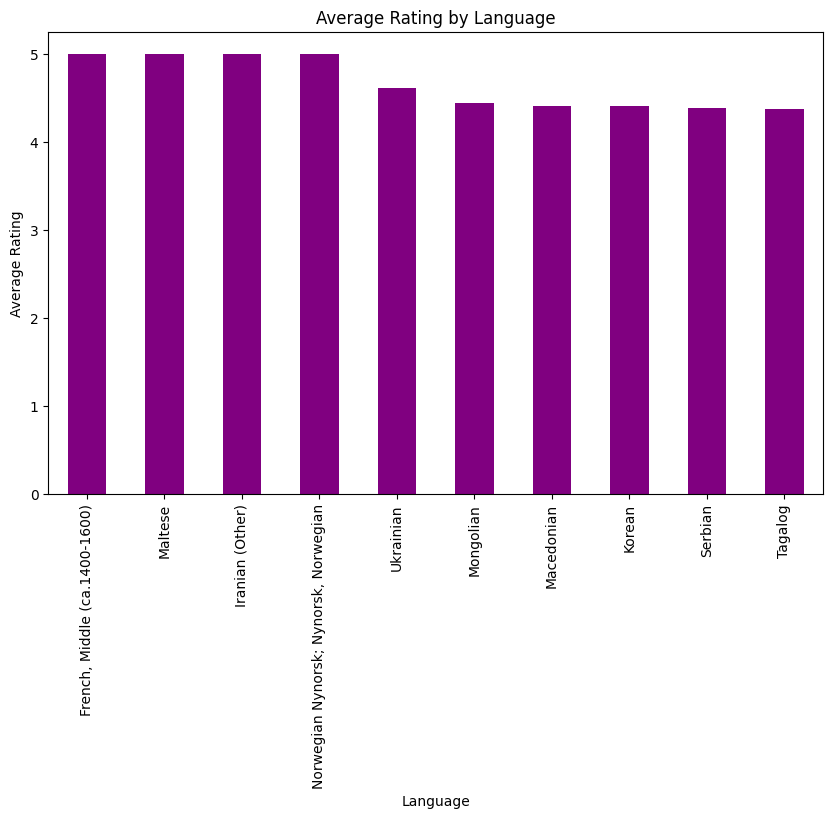

In [16]:
# Average rating by language
avg_rating_language = books_cleaned.groupby('language')['rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Languages with Highest Average Ratings:")
print(avg_rating_language)

avg_rating_language.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Average Rating by Language')
plt.xlabel('Language')
plt.ylabel('Average Rating')

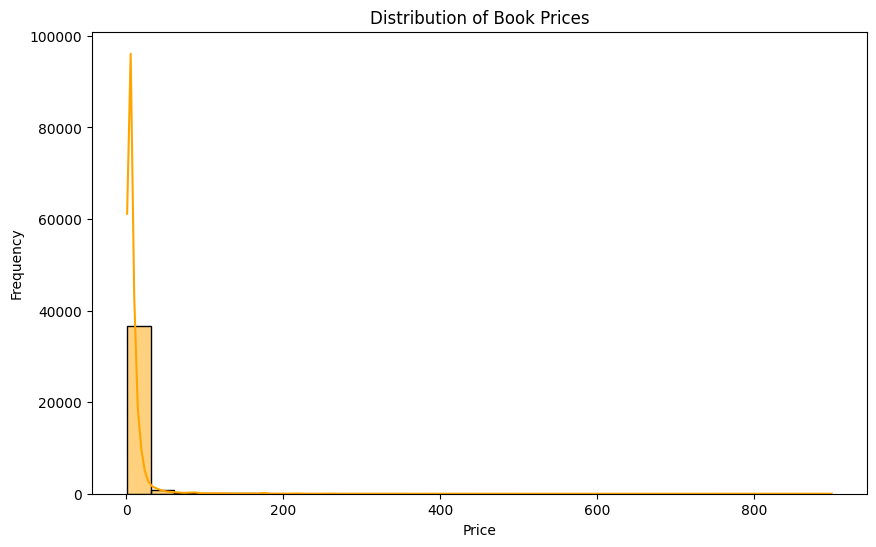

In [17]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(books_cleaned['price'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Top 10 Most Rated Books:
                                     title  \
32   Harry Potter and the Sorcerer's Stone   
0                         The Hunger Games   
4                                 Twilight   
2                    To Kill a Mockingbird   
27                        The Great Gatsby   
10                  The Fault in Our Stars   
80                                    1984   
3                      Pride and Prejudice   
21                               Divergent   
147    The Hobbit, or There and Back Again   

                                            author  numRatings  
32       J.K. Rowling, Mary GrandPré (Illustrator)     7048471  
0                                  Suzanne Collins     6376780  
4                                  Stephenie Meyer     4964519  
2                                       Harper Lee     4501075  
27   F. Scott Fitzgerald, Francis Scott Fitzgerald     3775504  
10                   John Green (Goodreads Author)     3550714  
80          

<ipython-input-19-8d11533b5569>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_rated_books, x='numRatings', y='title', palette='coolwarm')


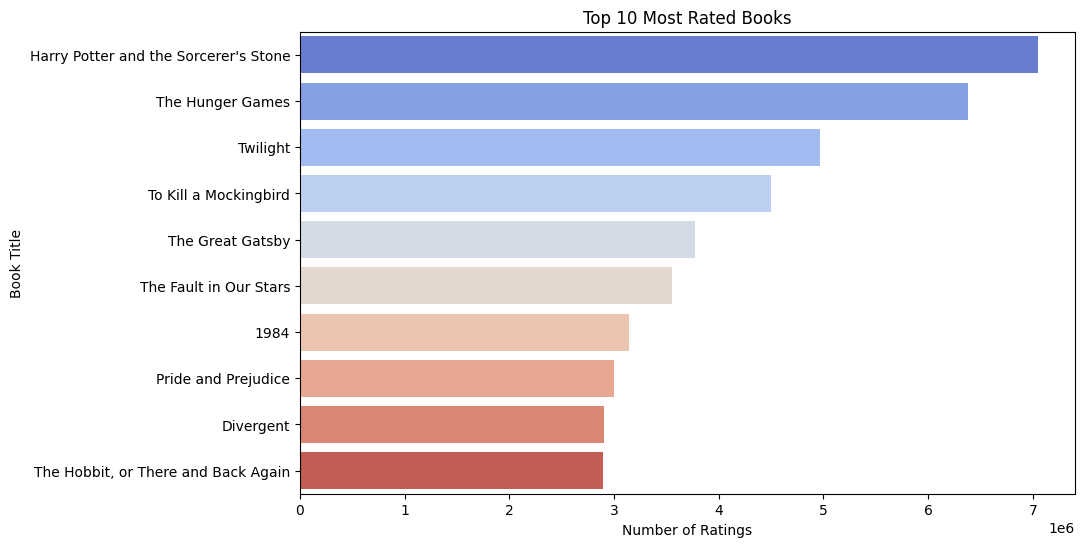

In [19]:
# Books with most ratings
most_rated_books = books_cleaned.nlargest(10, 'numRatings')
print("\nTop 10 Most Rated Books:")
print(most_rated_books[['title', 'author', 'numRatings']])

plt.figure(figsize=(10, 6))
sns.barplot(data=most_rated_books, x='numRatings', y='title', palette='coolwarm')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()


Top Languages by Number of Books:
language
English       42661
Arabic         1038
Spanish         687
French          579
German          528
Indonesian      371
Portuguese      363
Italian         255
Dutch           215
Turkish         211
Name: count, dtype: int64


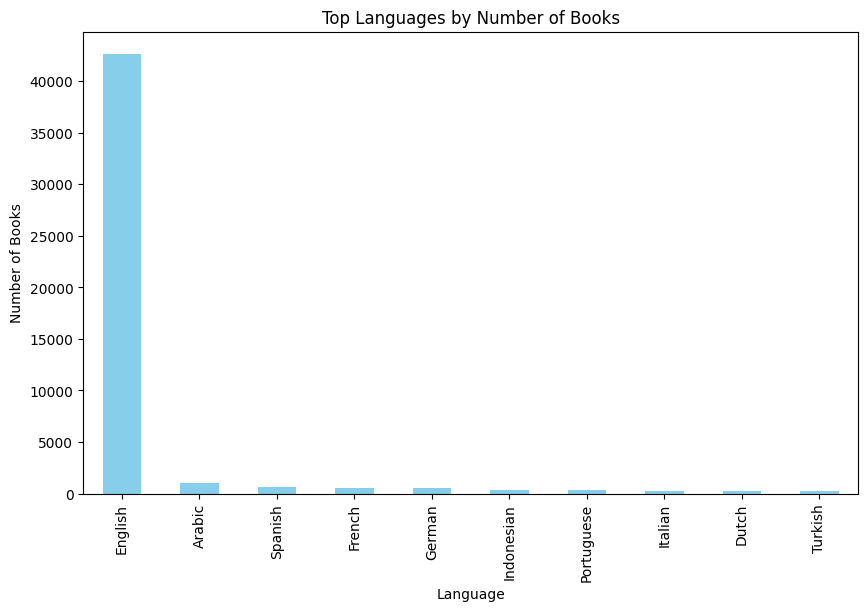

In [20]:
#  Language with the highest number of books
language_counts = books_cleaned['language'].value_counts()
print("\nTop Languages by Number of Books:")
print(language_counts.head(10))

language_counts.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top Languages by Number of Books')
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.show()


Top 10 Publishers by Number of Books:
publisher
Vintage                                        572
HarperCollins                                  563
Penguin Books                                  430
Ballantine Books                               399
Bantam                                         369
Createspace Independent Publishing Platform    367
Pocket Books                                   314
Avon                                           311
Berkley                                        287
Del Rey                                        284
Name: count, dtype: int64


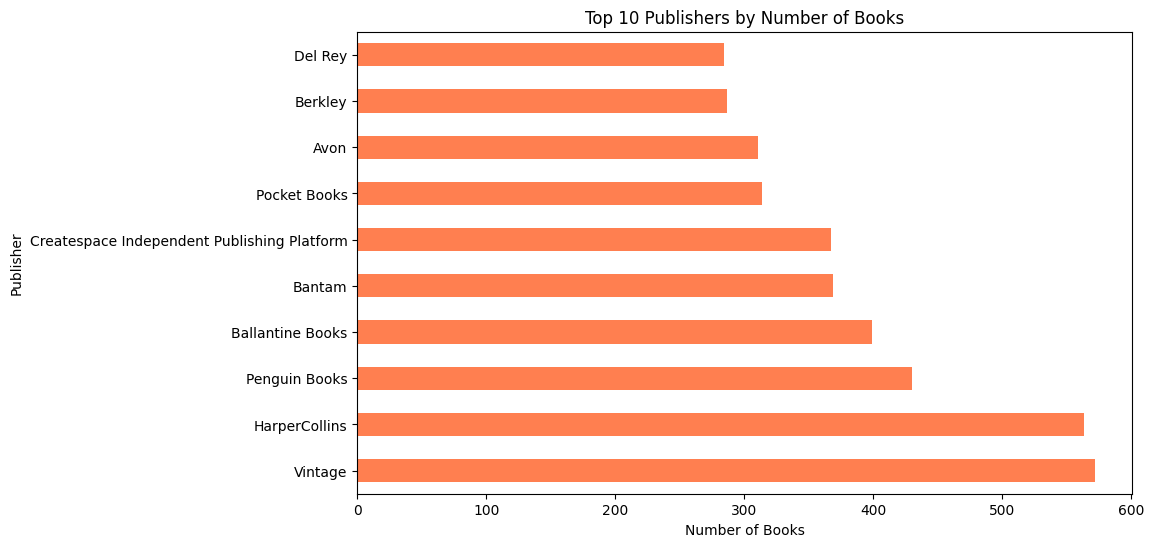

In [22]:
#Top 10 publishers with most books
publisher_counts = books_cleaned['publisher'].value_counts().head(10)
print("\nTop 10 Publishers by Number of Books:")
print(publisher_counts)

publisher_counts.plot(kind='barh', figsize=(10, 6), color='coral')
plt.title('Top 10 Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()


Top 5 Authors with Most Books:
author
Nora Roberts (Goodreads Author)     86
Agatha Christie                     72
Stephen King (Goodreads Author)     66
Erin Hunter                         59
Bella Forrest (Goodreads Author)    53
Name: count, dtype: int64


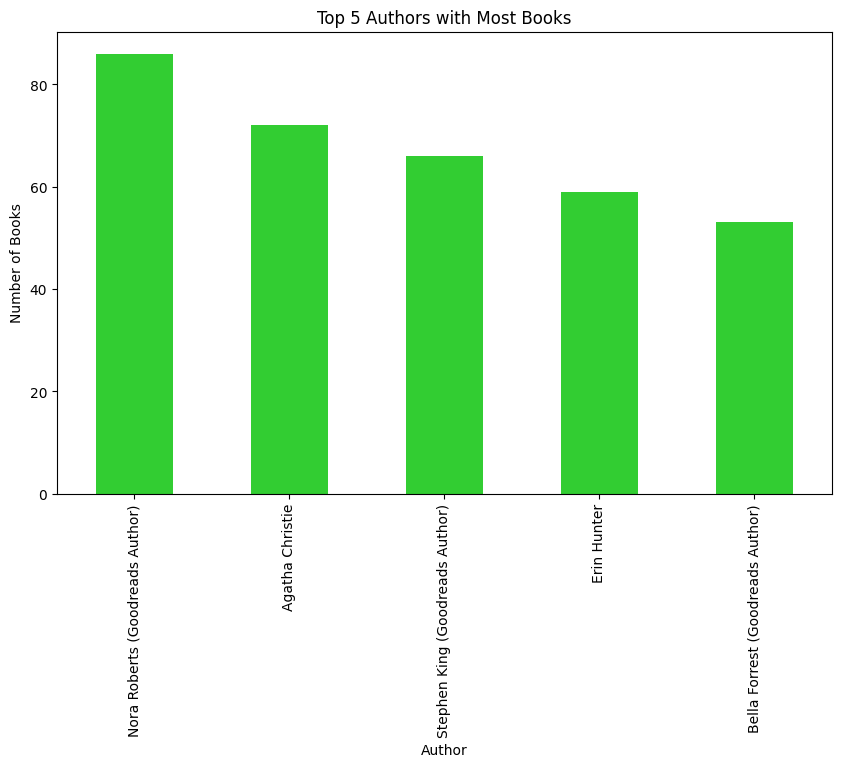

In [24]:
#  Top 5 authors with the most books
author_counts = books_cleaned['author'].value_counts().head(5)
print("\nTop 5 Authors with Most Books:")
print(author_counts)

author_counts.plot(kind='bar', figsize=(10, 6), color='limegreen')
plt.title('Top 5 Authors with Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.show()

In [ ]:
#CONCLUSION

Fiction, Fantasy, and Romance dominate the dataset, showcasing their universal appeal. Ratings are generally consistent, with most books achieving good reader satisfaction.
English leads as the most represented language, reflecting its global prominence. The analysis highlights trends in book genres, ratings, prices, and publishing over time.
These insights offer valuable perspectives into reader preferences and publishing patterns.